<a href="https://colab.research.google.com/github/vimesh630/Spice_Price_Predction_VERGER/blob/Cinnamon/Preprocessing_for_Cinnamon_Price_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Setting File Paths

In [2]:
input_path = '/content/drive/MyDrive/VERGER/Cinnamon_Price_Prediction/Cinnamon_Dataset_New_0001.xlsx'
clean_output_path = '/content/drive/MyDrive/VERGER/Cinnamon_Price_Prediction/clean_train_data.csv'
test_output_path = '/content/drive/MyDrive/VERGER/Cinnamon_Price_Prediction/clean_test_data.csv'
scaled_train_output = '/content/drive/MyDrive/VERGER/Cinnamon_Price_Prediction/scaled_train_lstm.csv'
scaled_test_output = '/content/drive/MyDrive/VERGER/Cinnamon_Price_Prediction/scaled_test_lstm.csv'

#3. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#4. Load the spreadsheet

In [4]:
df=pd.read_excel(input_path)

#5. Parse Date and Sort

In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month')
df.set_index('Month', inplace=True)

#6. Visualize Missing Values

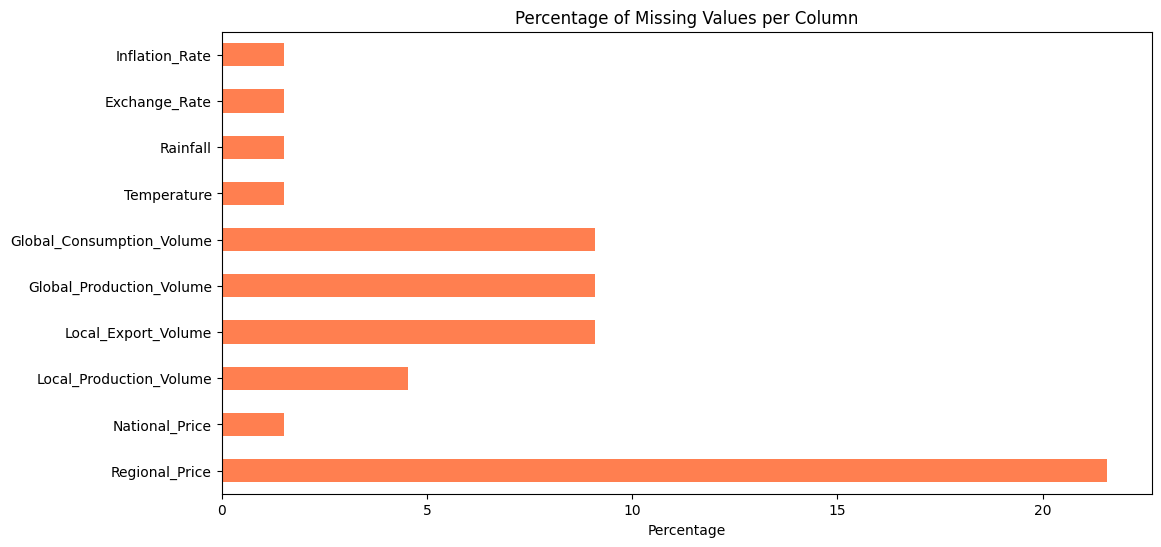

In [7]:
plt.figure(figsize=(12, 6))
missing = df.isnull().mean() * 100
missing[missing > 0].plot(kind='barh', color='coral')
plt.title("Percentage of Missing Values per Column")
plt.xlabel("Percentage")
plt.show()

#7. Interpolate Missing Values

In [8]:
df_interpolated = df.interpolate(method='time')
df_interpolated = df_interpolated.fillna(method='bfill').fillna(method='ffill')

/tmp/ipython-input-1988579645.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method='time')
/tmp/ipython-input-1988579645.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_interpolated = df_interpolated.fillna(method='bfill').fillna(method='ffill')


#8. Plot Interpolation Effect on a Key Feature

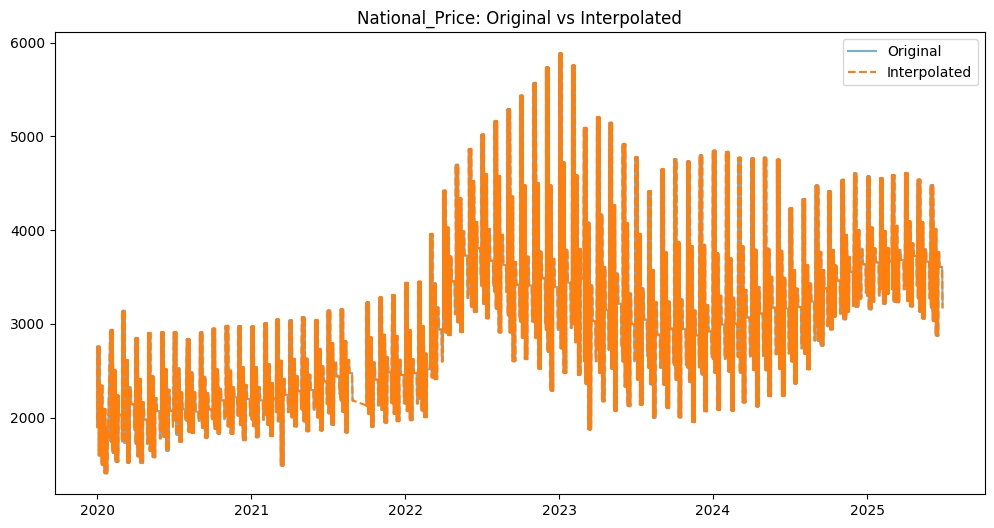

In [12]:
key_feature = 'National_Price'
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[key_feature], label='Original', alpha=0.6)
plt.plot(df_interpolated.index, df_interpolated[key_feature], label='Interpolated', linestyle='--')
plt.title(f"{key_feature}: Original vs Interpolated")
plt.legend()
plt.show()